In [1]:
import sys 
sys.path.append('../')
from lib.contact_graph_models import ContactMatrixGenerator

import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import sys
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
datasets = [
    'Thiers13',
    'LyonSchool',
    'InVS15',
]
clique_sizes = []
clique_counts = []

max_clique_size = 0
max_clique_count = 0    

for dataset in datasets:
    # datasets kde plots on top of one another 
    # data tij_pres_InVS13
    csv_path = os.path.join(os.path.abspath(""), 
                    f'../datasets/co-presence/tij_pres_{dataset}.dat')
    rwig = ContactMatrixGenerator(csv_path)
    # ratio, (num_rwig_graphs, tot_num_graphs) = rwig.assert_is_rwig_timeseries()
    # print(f'Percentage of graphs are RWIG compatible: {ratio}. {num_rwig_graphs} out of {tot_num_graphs} are RWIG compatible.')
    clique_size = rwig.plot_clique_size_distribution(False, True, None, True)
    max_clique_size = max(max_clique_size, max(clique_size))
    clique_sizes.append(clique_size)

    clique_count = rwig.plot_num_cliques_distribution(False, False)
    clique_counts.append(clique_count)
    max_clique_count = max(max_clique_count, max(clique_count))

## Clique size distribution

Min, max clique size: 2, 80
Min, max clique size: 2, 136
Min, max clique size: 2, 71


C:\Users\dalmasan\AppData\Local\Temp\ipykernel_18452\1375716887.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


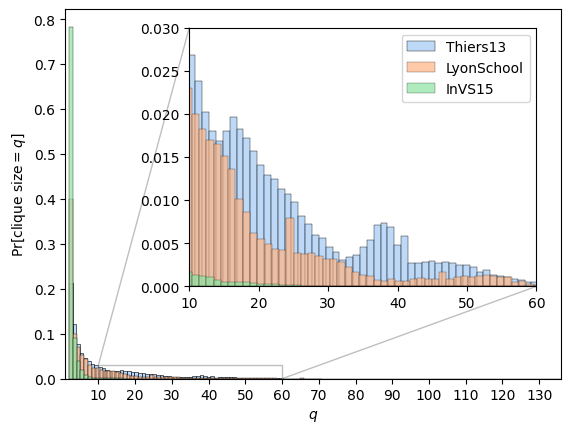

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
# , figsize=(10, 5))
for i, clique_size in enumerate(clique_sizes):
    print(f'Min, max clique size: {min(clique_size)}, {max(clique_size)}')
    sns.histplot(clique_size, kde=False, 
                 label=datasets[i], 
                 color=sns.color_palette('pastel')[i], 
                 stat='density', 
                 ax=ax, alpha=0.7,
                 log_scale=False,
                 bins=len(np.unique(clique_size)),
                 )

ax.set_xlim(1, max_clique_size)
ax.set_xlabel(r'$q$')
ax.set_ylabel(r'$\Pr[\text{clique size} = q]$')
ax.set_xticks(range(10, max_clique_size, 10))


# zoom in plot from tick 10 onwards and put the zoomed in plot in the top right corner
# make the zoomed in plot bigger
axins = ax.inset_axes([0.25, 0.25, 0.7, 0.7])

for i, clique_size in enumerate(clique_sizes):
    sns.histplot(clique_size, kde=False, 
                 label=datasets[i], 
                 color=sns.color_palette('pastel')[i], 
                 stat='density', 
                 ax=axins, alpha=0.7,
                 log_scale=False,
                 bins=len(np.unique(clique_size)),
                 )
axins.set_xlim(10, 60)
axins.set_ylim(0, 0.03)
axins.set_xticks(range(10, 70, 10))
axins.set_ylabel('')
# also make connections between the two plots
ax.indicate_inset_zoom(axins)

axins.legend()
fig.show()

## Clique count distribution

C:\Users\dalmasan\AppData\Local\Temp\ipykernel_18452\3523528984.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


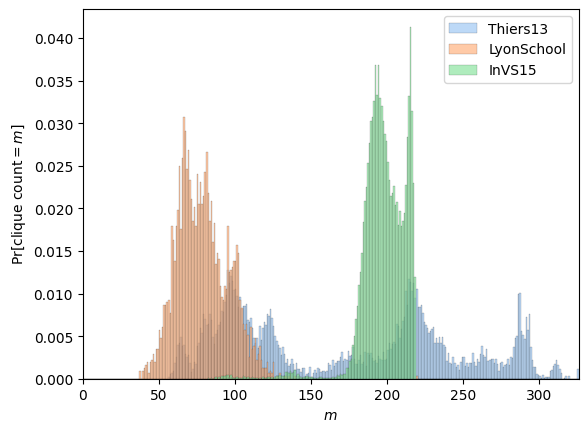

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for i, clique_count in enumerate(clique_counts):
    # print(f'Min, max clique count: {min(clique_count)}, {max(clique_count)}')
    sns.histplot(clique_count, kde=False, 
                 label=datasets[i], 
                 color=sns.color_palette('pastel')[i], 
                 stat='probability', 
                 ax=ax, alpha=0.7,
                 log_scale=False,
                 bins=range(0, max_clique_count+1)
                 )

ax.set_xlim(0, max_clique_count)
ax.set_xlabel(r'$m$')
ax.set_ylabel(r'$\Pr[\text{clique count} = m]$')
ax.legend()
fig.show()